## Домашнє завдання 4. Статистична перевiрка гiпотез

#### Пушкар Максим

In [3]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

### Задача 1

За твердженням компанiї «Ухань медiкалз», її новi лiки знижують рiвень
холестеролу в кровi на 18 одиниць. Було проведено випробування на 60 пацiєнтах, середнє зниження склало 17,3 одиницi, середньоквадратичне вiдхилення
4 одиницi. Чи можна на рiвнi значущостi 1 % спростувати твердження компанiї?

$X, n = 60, \ \overline{X} = 17.3, \ s_X = 4, \ \alpha = 0.01, \ \mu_0 = 18$ 

Припускаємо, що $X$ має нормальний розподіл. Перевіряємо 
$$H_0 \ : \ \mu = \mu_0$$

Використовуємо t-тест Стьюдента:
$$T = \frac{\overline{X} - \mu_0}{s_X / \sqrt{n}} \simeq t_{n-1}$$

In [4]:
n = 60
X_hat = 17.3
s_X = 4
mu_0 = 18
al = 0.01

t = (X_hat - mu_0)/(s_X / n**0.5)
t

-1.3555441711725946

Перевіряємо чи належить статистика критичній області:

In [5]:
scipy.stats.t.ppf(al/2, df=n-1) < t < scipy.stats.t.ppf(1 - al/2, df=n-1)

True

Ні, не належить, одже гіпотезу $H_0$ не відхиляємо.

Альтернативно можна порахувати p-value:

In [6]:
p_value = 2 * scipy.stats.t.cdf(-abs(t), df=n-1)
p_value

0.18041075552717975

In [7]:
p_value > al

True

p-value більше за $\alpha$, тому $H_0$ не відхиляємо.

### Задача 2

В результатi вимiрювання зросту 12 дорослих японцiв та 12 дорослих англiйцiв визначили, що середнiй зрiст японцiв становить 167,5 см iз середньоквадратичним вiдхиленням 7,5 см, а середнiй зрiст англiйцiв становить 175 см iз середньоквадратичним вiдхиленням 5 см.

    а) Чи можна стверджувати на рiвнi значущостi 5%, що англiйцi вищi, нiж японцi?
    
    б) Проаналiзуйте використанi вами припущення.

In [30]:
n = 12
X_hat = 167.5
sig_X = 7.5

m = 12
Y_hat = 175
sig_Y = 5

al = 0.05

$H_0 \ : \ \Delta = \mu_X - \mu_Y < 0$

Припущення: 

1) $X, Y$ незалежні 

2) $X \simeq N(\mu_X, \sigma^2)$ , $Y \simeq N(\mu_Y, \sigma^2)$

Використовуємо t-тест Стьюдента:

$$s_p^2 = \frac{(n-1)s_X^2 + (m-1)s_Y^2}{n+m-2} = \frac{n\sigma_X^2 + m\sigma_Y^2}{n+m-2}$$

$$T = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{s_p^2}{n} + \frac{s_p^2}{m}}} \simeq t_{n + m - 2}$$

In [34]:
s_p_squared = (n * sig_X**2 + m * sig_Y**2)/(n + m - 2)

In [32]:
t = (X_hat - Y_hat)/((s_p_squared/n + s_p_squared/m)**0.5)
t

-2.7595986330233995

Перевіряємо чи належить статистика критичній області:

In [35]:
t < scipy.stats.t.ppf(1 - al, df=n + m - 2)

True

Ні, не належить, одже гіпотезу $H_0$ не відхиляємо.

Альтернативно можна порахувати p-value:

In [ ]:
p_value = 1 - scipy.stats.t.cdf(t, df=n + m - 2)
p_value

0.994282097730297

In [13]:
p_value > al

False

p-value більше за $\alpha$, тому $H_0$ не відхиляємо.

### Задача 3

Компанiя виробляє диски для автомобiльних колiс рiзного дiаметру. Для порiвняння якостi було взято 18 дискiв номiнального дiаметру 17” та 25 дискiв номiнального дiаметру 18”. Виявилося, що вибiрковi середньоквадратичне вiдхилення дiаметру для першої групи становить 0,1”, для другої — 0,2”. На рiвнi значущостi 5 % перевiрте гiпотезу про те, що середньоквадратичнi вiдхилення для дискiв рiзного дiаметру вiдрiзняються.

In [14]:
# X
n1 = 18
d1 = 17
s1 = 0.1

# Y
n2 = 25
d2 = 18
s2 = 0.2

al = 0.05

$H_0 \ : \ \sigma_X^2 = \sigma_Y^2$

Припущення: 

1) $X, Y$ незалежні 

2) $X, Y$ нормально розподілені

Користуємося F-тестом Фішера

$$F=\frac{s^2_X}{s^2_Y}~ \simeq ~F(n_1-1,n_2-1)$$

In [15]:
f = s1**2 / s2**2
f

0.25

Критична область:

In [100]:
scipy.stats.f.ppf(al/2, dfn=n1-1, dfd=n2-1) < f < scipy.stats.f.ppf(1 - al/2, dfn=n1-1, dfd=n2-1)

False

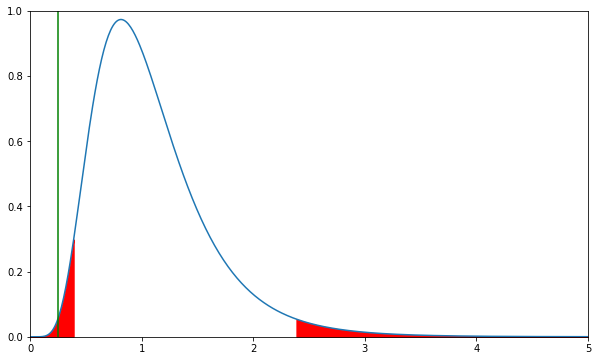

In [101]:
x = np.linspace(0, 5, 500)
y = scipy.stats.f.pdf(x, dfn=n1-1, dfd=n2-1)

plt.xlim( 0, 5 )
plt.ylim( 0, 1 )

plt.plot(x, y)

a = scipy.stats.f.ppf(al/2, dfn=n1-1, dfd=n2-1)
b = scipy.stats.f.ppf(1 - al/2, dfn=n1-1, dfd=n2-1)

# plt.axvline(x=a)
# plt.axvline(x=b)
plt.axvline(x=f, color="green")

x_left = np.linspace(0, a, 50)
plt.fill_between(x=x_left, y1 = scipy.stats.f.pdf(x_left, dfn=n1-1, dfd=n2-1), color="red")

x_right = np.linspace(b, 5, 50)
plt.fill_between(x=x_right, y1 = scipy.stats.f.pdf(x_right, dfn=n1-1, dfd=n2-1), color="red")


plt.show()

### Задача 4

За допомогою онлайн-генератора змоделюйте показники температури пацiєнтiв лiкарнi до та пiсля лiкування; отриманi вибiрки позначимо $X$ та $Y$. Вважається, що показники температури до лiкування мають нормальний розподiл з параметрами $N(\mu_X , \sigma^2)$, пiсля лiкування — нормальний розподiл з параметрами $N(\mu_Y , \sigma^2)$.

In [102]:
before = np.random.normal(37.6, 1, 25)
after = np.random.normal(36.6, 1, 25)
before

array([36.96029785, 39.12398145, 36.13744857, 36.74158523, 39.38736541,
       37.36069862, 38.72072616, 36.76190295, 38.63670885, 35.21798556,
       37.71972959, 38.14559875, 37.66151491, 37.81951345, 37.0683477 ,
       38.21864335, 37.13586447, 37.90261664, 37.90742185, 37.95470478,
       37.72611352, 36.19788411, 38.03940751, 39.20351187, 37.82685495])

а) Побудуйте (точний) 95 %-й довiрчий iнтервал для середнього значення температури до лiкування.

In [103]:
al = 0.05

$$T = \frac{\overline{X} - \mu_0}{s_X / \sqrt{n}} \simeq t_{n-1}$$

$$\displaystyle \mu \in \left[{\hat {\mu }}-t_{n-1,1-\alpha /2}{\frac {1}{\sqrt {n}}}s_X,{\hat {\mu }}+t_{n-1,1-\alpha /2}{\frac {1}{\sqrt {n}}}s_X\right]$$

Довірчий інтервал:

In [104]:
q = scipy.stats.t.ppf(1 - al/2, df=len(before)-1)
a = np.mean(before) - q * np.std(before) / len(before)**0.5
b = np.mean(before) + q * np.std(before) / len(before)**0.5

In [105]:
print(f"довірчий інтервал : ({a}, {b})")

довірчий інтервал : (37.26012235223539, 38.06599189529498)


б) За припущення незалежностi вибiрок $X$ та $Y$ сумiсна виправлена дисперсiя

$$s_p^2 = \frac1{48} \left(\sum_{k=1}^{25} (X_k-\bar{X})^2 + \sum_{k=1}^{25} (Y_k-\bar{Y})^2\right)$$

має розподiл $\frac{\sigma^2}{48} \chi^2_{48} $. Враховуючи
цю iнформацiю, побудуйте (точний) 95 %-й правостороннiй довiрчий iнтервал
для $\sigma^2$.

In [108]:
s_p_squared = (before.var()*25 + after.var()*25)/48

In [115]:
q1, q2 = scipy.stats.chi2.ppf(al/2, df=48), scipy.stats.chi2.ppf(1 - al/2, df=48)
a = s_p_squared * 48 / q2
b = s_p_squared * 48 / q1

In [116]:
print(f"довірчий інтервал : ({a}, {b})")

довірчий інтервал : (0.7869051468102926, 1.7660575824988811)


в) Побудуйте (точний) 95 %-й лiвостороннiй довiрчий iнтервал для рiзницi
середнiх $\mu_X − \mu_Y$ . Зробiть вiдповiдний висновок про ефективнiсть лiкування
(перевiрте вiдповiдну гiпотезу).

In [126]:
al = 0.05

In [118]:
s_p_squared = (25 * np.std(before)**2 + 25 * np.std(after)**2)/(25 + 25 - 2)

In [129]:
m = (np.mean(after) - np.mean(before))
b = m + ((s_p_squared/25 + s_p_squared/25)**0.5) * scipy.stats.t.ppf(1 - al, df=48)

In [130]:
print(f"довірчий інтервал : ({-np.inf}, {b})")

довірчий інтервал : (-inf, -0.9792400674024058)
